In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import matplotlib.dates as mdates

In [2]:
data = pd.read_csv('microsoft_cleaned_data.csv')

# Convert Date to datetime and set it as the index
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)


In [3]:
import plotly.graph_objects as go

# Plot High Price and Moving Averages
fig = go.Figure()
fig.add_trace(go.Scatter(x=data.index, y=data['High'], mode='lines', name='High Price'))
fig.add_trace(go.Scatter(x=data.index, y=data['MA5'], mode='lines', name='MA5'))
fig.add_trace(go.Scatter(x=data.index, y=data['MA10'], mode='lines', name='MA10'))
fig.add_trace(go.Scatter(x=data.index, y=data['MA20'], mode='lines', name='MA20'))
fig.update_layout(title='Microsoft Stock Price', xaxis_title='Date', yaxis_title='Price')
fig.show()

# Plot Moving Averages for the year 2021
data_2021 = data.loc['2023']

fig = go.Figure()
fig.add_trace(go.Scatter(x=data_2021.index, y=data_2021['MA5'], mode='lines', name='MA5'))
fig.add_trace(go.Scatter(x=data_2021.index, y=data_2021['MA10'], mode='lines', name='MA10'))
fig.add_trace(go.Scatter(x=data_2021.index, y=data_2021['MA20'], mode='lines', name='MA20'))
fig.update_layout(title='Moving Averages for 2023', xaxis_title='Date', yaxis_title='Price')
fig.show()

# Plot Bollinger Bands
fig = go.Figure()
fig.add_trace(go.Scatter(x=data.index, y=data['High'], mode='lines', name='High Price'))
fig.add_trace(go.Scatter(x=data.index, y=data['BB_upper'], mode='lines', name='BB Upper'))
fig.add_trace(go.Scatter(x=data.index, y=data['BB_lower'], mode='lines', name='BB Lower'))
fig.update_layout(title='Bollinger Bands', xaxis_title='Date', yaxis_title='Price')
fig.show()


In [4]:
# Use only the 'High' price for prediction, but you can add more features
# We will use Open, Low, Close, Adj Close, and Volume as input features
data = data.loc[:, ['Open', 'Low', 'Close', 'Adj Close', 'Volume', 'High', 'MA5', 'MA10', 'MA20', 'EMA', 'BB_upper', 'BB_lower']]

# Define the features (independent variables) and the target (dependent variable)
features = ['Open', 'Low', 'Close', 'Volume', 'MA5', 'MA10', 'MA20', 'EMA', 'BB_upper', 'BB_lower']  # Features
target = 'High'  # Target is the highest price

X = data[features]  # Independent variables
y = data[target] 

data.dropna(inplace=True)

data 

Open         Low       Close   Adj Close    Volume  \
Date                                                                   
2010-01-04   30.620001   30.590000   30.950001   23.474922  38409100   
2010-01-05   30.850000   30.639999   30.959999   23.482502  49749600   
2010-01-06   30.879999   30.520000   30.770000   23.338396  58182400   
2010-01-07   30.629999   30.190001   30.450001   23.095678  50559700   
2010-01-08   30.280001   30.240000   30.660000   23.254963  51197400   
...                ...         ...         ...         ...       ...   
2023-11-16  370.959991  370.179993  376.170013  376.170013  27182300   
2023-11-17  373.609985  367.000000  369.850006  369.850006  40157000   
2023-11-20  371.220001  371.000000  377.440002  377.440002  52465100   
2023-11-21  375.670013  371.119995  373.070007  373.070007  28423100   
2023-11-22  378.000000  374.970001  377.850006  377.850006  23345300   

                  High         MA5        MA10        MA20         EMA  \
Date                                                                     
2010-01-04   31.100000   31.212000   31.023000   30.546500   30.625838   
2010-01-05   31.100000   31.196000   31.088000   30.583000   30.670997   
2010-01-06   31.080000   31.112000   31.112000   30.633000   30.709949   
2010-01-07   30.700001   30.994000   31.089000   30.681000   30.709002   
2010-01-08   30.879999   30.972000   31.082000   30.734500   30.725287   
...                ...         ...         ...         ...         ...   
2023-11-16  376.350006  372.000006  366.305005  352.939505  356.669465   
2023-11-17  374.369995  372.854004  368.303003  355.062004  358.355229   
2023-11-20  378.869995  374.934003  370.436001  357.369003  360.309017   
2023-11-21  376.220001  375.788000  371.812003  359.588004  361.824348   
2023-11-22  379.790009  377.120001  373.404004  361.267503  363.535364   

              BB_upper    BB_lower  
Date                                
2010-01-04   31.640682   29.452318  
2010-01-05   31.700839   29.465161  
2010-01-06   31.745553   29.520447  
2010-01-07   31.711114   29.650886  
2010-01-08   31.681973   29.787027  
...                ...         ...  
2023-11-16  383.312844  322.566166  
2023-11-17  385.182500  324.941508  
2023-11-20  387.355204  327.382803  
2023-11-21  388.154523  331.021484  
2023-11-22  390.462626  332.072381  

[3497 rows x 12 columns]

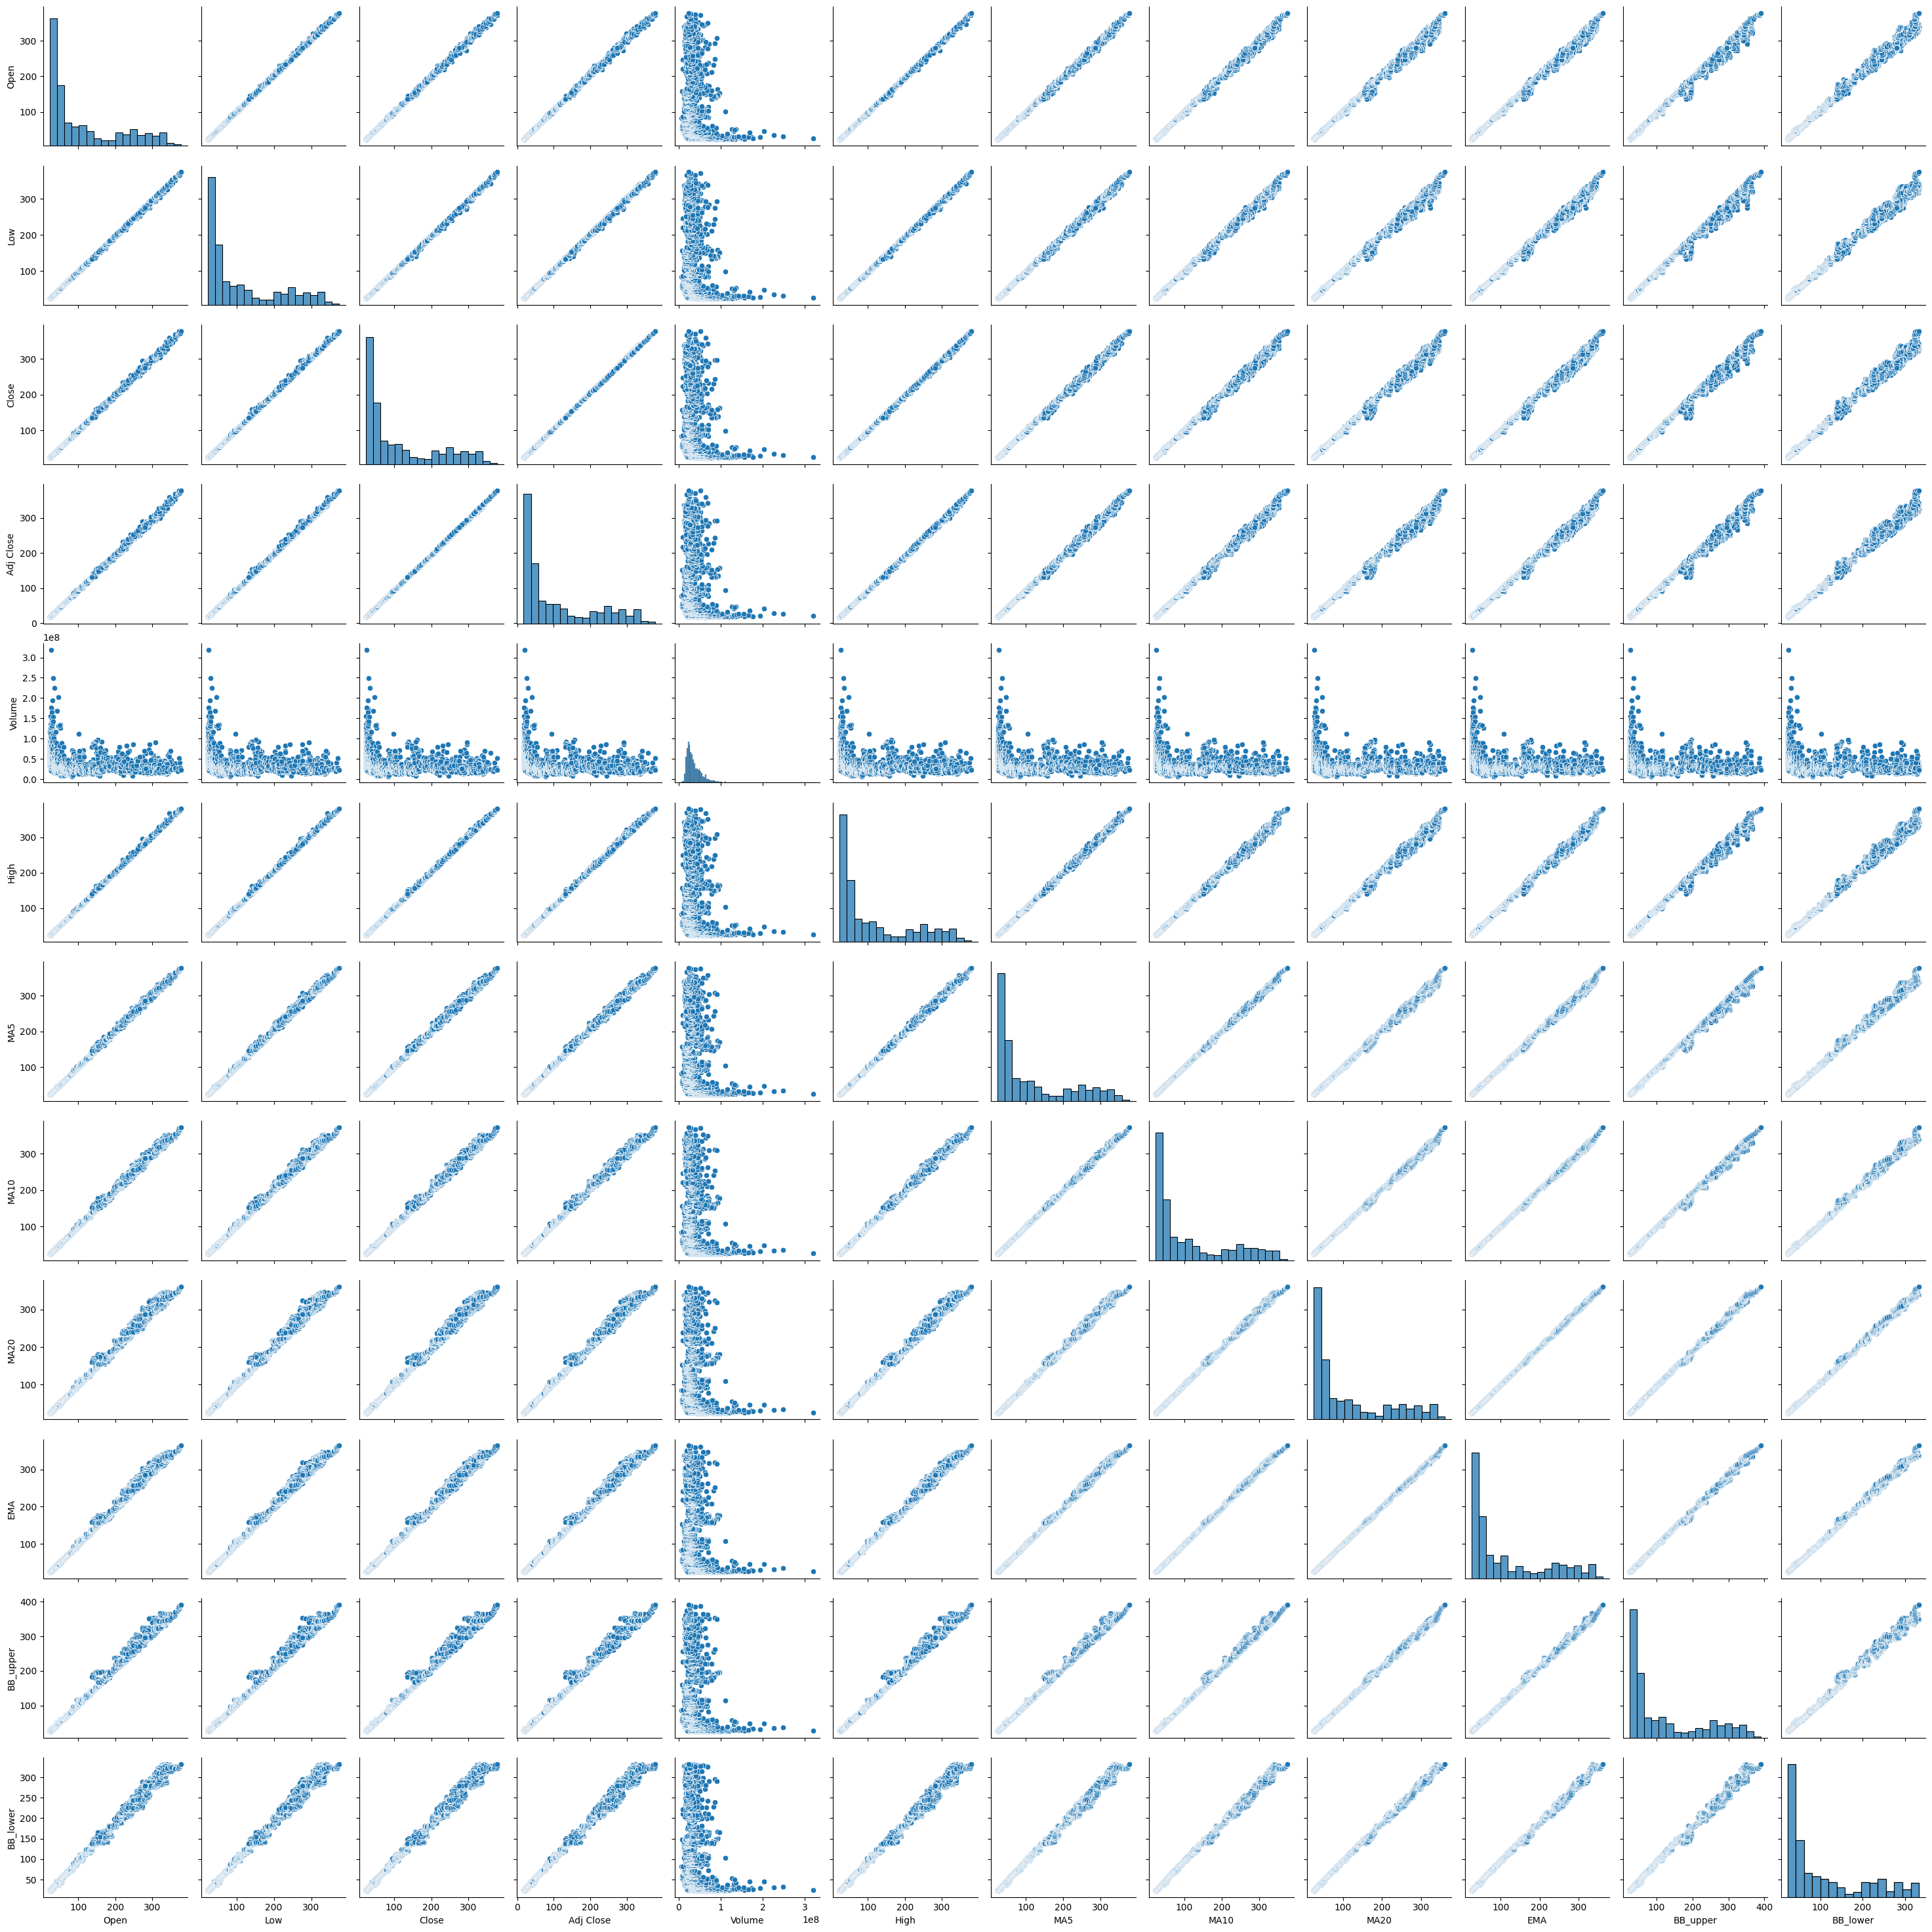

In [5]:
import seaborn as sns  #to plot graphs #for linear regression model
sns.pairplot(data)
plt.show()

In [6]:
data.dropna()
# Split data into training and testing sets based on dates
train_df = data[:'2020-12-31']
test_df = data['2021-01-01':]

# Extract features and target from the training and testing DataFrames
X_train = train_df.drop(['High'], axis=1)  # Replace 'target_column' with the actual target column name
y_train = train_df['High']

X_test = test_df.drop(['High'], axis=1)
y_test = test_df['High']

# Check the shapes of the training and testing sets
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(2769, 11)
(2769,)
(728, 11)
(728,)


In [7]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [8]:
# Initialize the Linear Regression model
model = LinearRegression()

# Train the model using the training set
model.fit(X_train_scaled, y_train)

# Print model coefficients (weights)
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Coefficients: [116.17503133 -43.17993698 113.72421988  -5.36863726   1.38787059
  29.119581   -25.91968909   0.39578543  24.35896388   7.34213407
  -7.39765258]
Intercept: 23.177771843635426


In [9]:
# Make predictions on the testing set
y_pred = model.predict(X_test_scaled)

# Display all predictions in table form
predictions_df = pd.DataFrame({
    'Date': y_test.index,
    'Predicted High Prices': y_pred,
    'Actual High Prices': y_test.values
})

print(predictions_df.head(10))

        Date  Predicted High Prices  Actual High Prices
0 2021-01-04             223.367238          223.000000
1 2021-01-05             220.011914          218.520004
2 2021-01-06             214.787828          216.490005
3 2021-01-07             218.449722          219.339996
4 2021-01-08             220.978083          220.580002
5 2021-01-11             219.686871          218.910004
6 2021-01-12             217.955735          217.100006
7 2021-01-13             217.245723          216.759995
8 2021-01-14             216.880269          217.460007
9 2021-01-15             215.428989          214.509995


In [10]:
# Calculate MAE, MSE, and RMSE
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

Mean Absolute Error (MAE): 1.2138688451926882
Mean Squared Error (MSE): 2.471268217838132
Root Mean Squared Error (RMSE): 1.5720267866159698


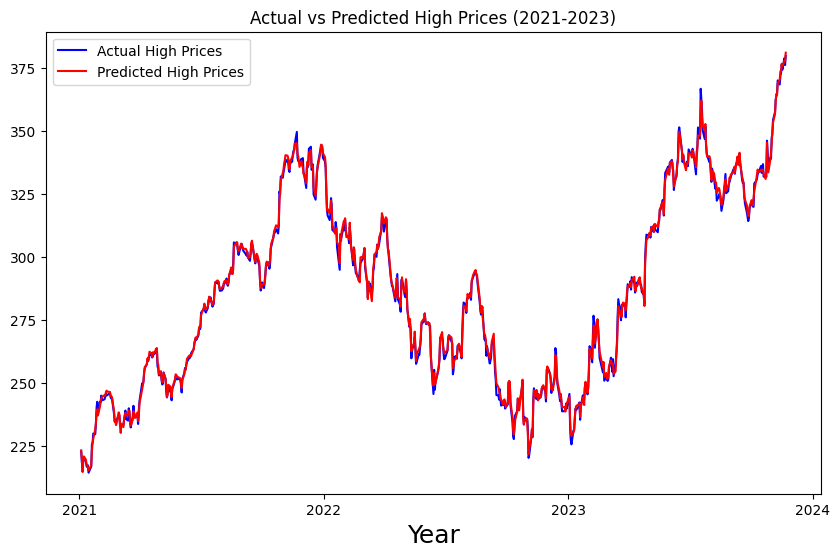

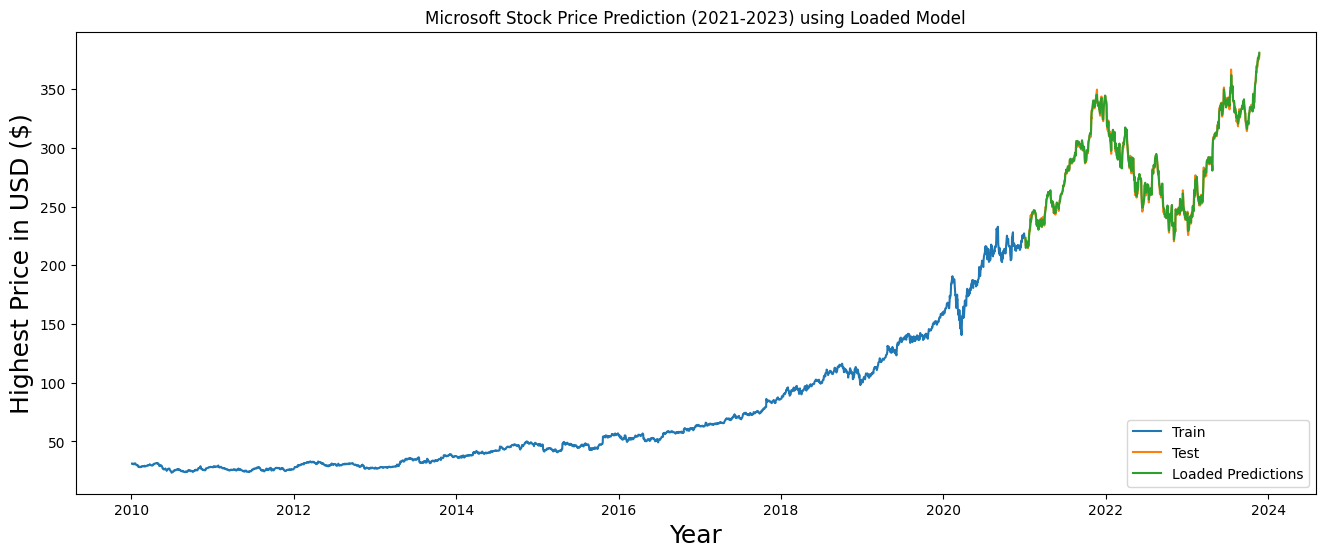

In [11]:
# Define train and valid DataFrames
train = data[:'2020-12-31']
valid = data['2021-01-01':].copy()

# Assuming 'Loaded_Predictions' is already calculated and added to the 'valid' DataFrame
# If not, you need to add the predictions to the 'valid' DataFrame
valid['Loaded_Predictions'] = y_pred

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(y_test.index, y_test.values, label='Actual High Prices', color='blue')
plt.plot(y_test.index, y_pred, label='Predicted High Prices', color='red')
plt.xlabel('Year', fontsize=18)
plt.title('Actual vs Predicted High Prices (2021-2023)')
plt.legend()

# Format the x-axis to show years
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.show()

# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Microsoft Stock Price Prediction (2021-2023) using Loaded Model')
plt.xlabel('Year', fontsize=18)
plt.ylabel('Highest Price in USD ($)', fontsize=18)
plt.plot(train['High'], label='Train')
plt.plot(valid['High'], label='Test')
plt.plot(valid['Loaded_Predictions'], label='Loaded Predictions')
plt.legend(loc='lower right')
plt.show()

In [12]:
from xgboost import XGBRegressor

# Step 1: Calculate residuals (errors) from Linear Regression model
residuals_train = y_train - model.predict(X_train_scaled)
print("Residuals (Train): " ,residuals_train)

# Step 2: Train XGBoost on residuals
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
xgb_model.fit(X_train_scaled, residuals_train)

# Step 3: Predict residuals on test data
residuals_test_pred = xgb_model.predict(X_test_scaled)

# Step 4: Combine Linear Regression predictions with XGBoost residual predictions
y_pred_combined = y_pred + residuals_test_pred

# Display predictions in table form
predictions_combined_df = pd.DataFrame({
    'Date': y_test.index,
    'Actual High Prices': y_test.values,
    'Predicted High Prices (Hybrid)': y_pred_combined
})

print(predictions_combined_df.head(10))


Residuals (Train):  Date
2010-01-04    0.114201
2010-01-05   -0.057176
2010-01-06   -0.046465
2010-01-07   -0.133186
2010-01-08    0.147797
                ...   
2020-12-24   -0.163682
2020-12-28   -0.400387
2020-12-29    0.159605
2020-12-30    0.085154
2020-12-31   -1.285922
Name: High, Length: 2769, dtype: float64
        Date  Actual High Prices  Predicted High Prices (Hybrid)
0 2021-01-04          223.000000                      223.974651
1 2021-01-05          218.520004                      219.278434
2 2021-01-06          216.490005                      215.743104
3 2021-01-07          219.339996                      218.748002
4 2021-01-08          220.580002                      220.480039
5 2021-01-11          218.910004                      219.429297
6 2021-01-12          217.100006                      217.535298
7 2021-01-13          216.759995                      216.489263
8 2021-01-14          217.460007                      217.281106
9 2021-01-15          214.50999

In [13]:
# Calculate metrics for hybrid model
mae_combined = mean_absolute_error(y_test, y_pred_combined)
mse_combined = mean_squared_error(y_test, y_pred_combined)
rmse_combined = np.sqrt(mse_combined)

print(f"Hybrid Model - Mean Absolute Error (MAE): {mae_combined}")
print(f"Hybrid Model - Mean Squared Error (MSE): {mse_combined}")
print(f"Hybrid Model - Root Mean Squared Error (RMSE): {rmse_combined}")

Hybrid Model - Mean Absolute Error (MAE): 1.3094248481126622
Hybrid Model - Mean Squared Error (MSE): 3.0283641578382183
Hybrid Model - Root Mean Squared Error (RMSE): 1.740219571731745


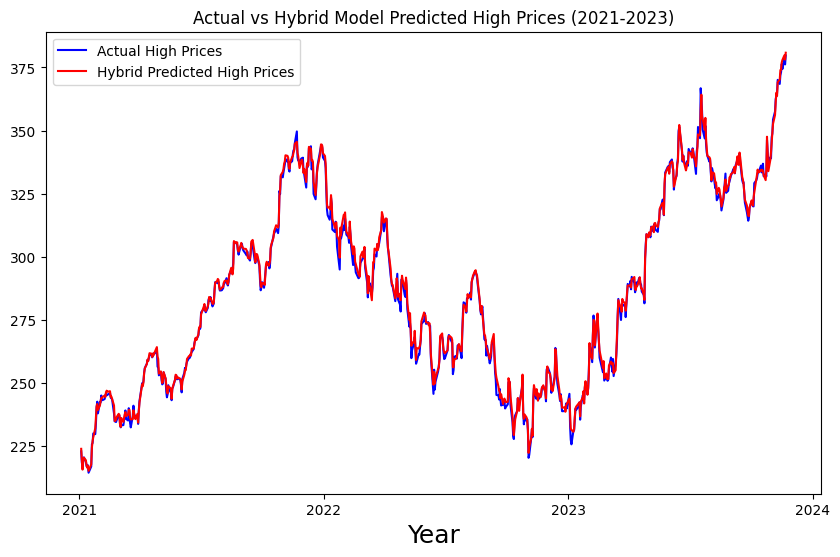

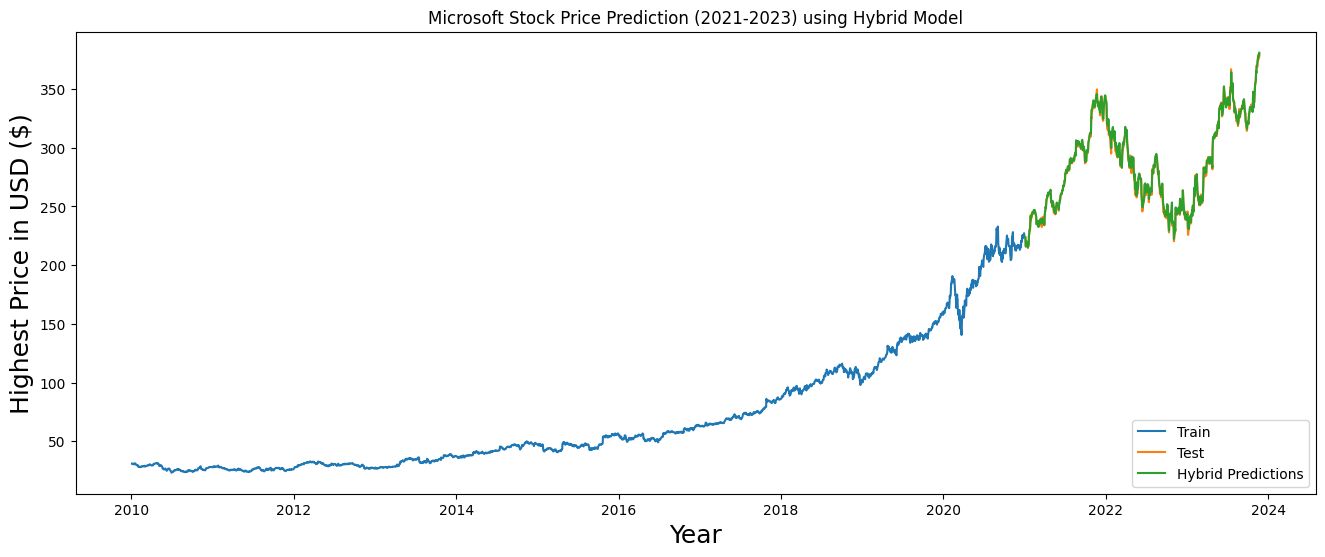

In [14]:
# Plot actual vs hybrid model predicted values
plt.figure(figsize=(10, 6))
plt.plot(y_test.index, y_test.values, label='Actual High Prices', color='blue')
plt.plot(y_test.index, y_pred_combined, label='Hybrid Predicted High Prices', color='red')
plt.xlabel('Year', fontsize=18)
plt.title('Actual vs Hybrid Model Predicted High Prices (2021-2023)')
plt.legend()

# Format the x-axis to show years
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.show()

# Visualize the data with hybrid model predictions
valid['Hybrid_Predictions'] = y_pred_combined

plt.figure(figsize=(16,6))
plt.title('Microsoft Stock Price Prediction (2021-2023) using Hybrid Model')
plt.xlabel('Year', fontsize=18)
plt.ylabel('Highest Price in USD ($)', fontsize=18)
plt.plot(train['High'], label='Train')
plt.plot(valid['High'], label='Test')
plt.plot(valid['Hybrid_Predictions'], label='Hybrid Predictions')
plt.legend(loc='lower right')
plt.show()


            Predicted High Prices
2023-12-04             380.843838
2023-12-05             380.843838
2023-12-06             380.843838
2023-12-07             380.843838
2023-12-08             380.843838
...                           ...
2024-07-08             380.843838
2024-07-09             380.843838
2024-07-10             380.843838
2024-07-11             380.843838
2024-07-12             380.843838

[160 rows x 1 columns]


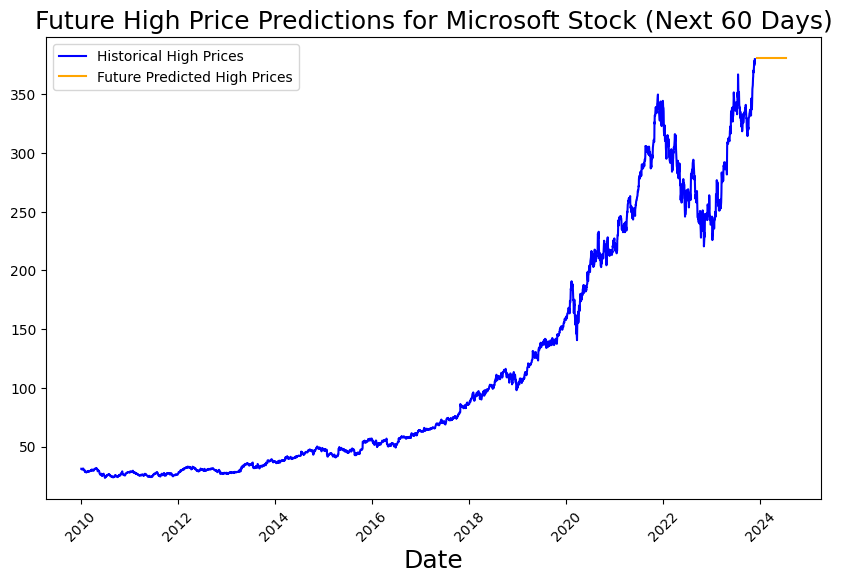

In [17]:
# %% Predict future 60 days

# Step 1: Prepare the features for the next 60 days
last_date = data.index[-1]  # Get the last date in the dataset
future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=160, freq='B')  # Generate next 60 business days

# Create a DataFrame for future predictions
future_df = pd.DataFrame(index=future_dates)

# Fill in the last known values for the features
# You may need to adjust this depending on your feature engineering
last_row = data.iloc[-1]

# Use the last known values to project into the future
for feature in ['Open', 'Low', 'Close', 'Adj Close', 'Volume', 'MA5', 'MA10', 'MA20', 'EMA', 'BB_upper', 'BB_lower']:
    future_df[feature] = last_row[feature]

# Step 2: Scale the future features using the same scaler
future_df_scaled = scaler.transform(future_df)

# Step 3: Predict using the Linear Regression model
linear_predictions = model.predict(future_df_scaled)

# Step 4: Predict residuals using the XGBoost model
xgb_residuals_pred = xgb_model.predict(future_df_scaled)

# Step 5: Combine predictions for the final output
future_predictions = linear_predictions + xgb_residuals_pred

# Step 6: Create a DataFrame for the final predictions
future_predictions_df = pd.DataFrame({
    'Predicted High Prices': future_predictions
}, index=future_dates)

# Step 7: Display the future predictions
print(future_predictions_df)

# Step 8: Visualize the predictions
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['High'], label='Historical High Prices', color='blue')
plt.plot(future_predictions_df.index, future_predictions_df['Predicted High Prices'], label='Future Predicted High Prices', color='orange')
plt.xlabel('Date', fontsize=18)
plt.title('Future High Price Predictions for Microsoft Stock (Next 60 Days)', fontsize=18)
plt.legend()
plt.xticks(rotation=45)
plt.show()